## Self Attention Model.

<div class="alert alert-block alert-info">
The primary limitation of simple attention mechanisms lies in their reliance on semantic similarity to determine attention weights. These mechanisms often prioritize tokens with high semantic similarity, leading to:

Limited Contextual Understanding:
Attention scores may be low for tokens that are not semantically similar to the query, even if they are crucial for understanding the overall context. For instance, in a sentence like "The quick brown fox jumps over the lazy dog," a simple attention mechanism might assign low attention to "jumps" if the query focuses on "lazy," despite "jumps" being essential to understanding the action and context of the sentence. Inflexibility:

The attention mechanism is constrained by the pre-defined similarity measure, often based on dot product or cosine similarity between token embeddings. This restricts the model's ability to capture more nuanced relationships and dependencies between tokens within the sequence. To overcome these limitations, more sophisticated attention mechanisms are required:

Trainable Models:
By incorporating trainable parameters within the attention mechanism, the model can learn to dynamically adjust attention weights based on the specific task and data. This allows the model to: Capture complex relationships: Identify and attend to tokens that are contextually relevant, even if they are not semantically similar to the query. Learn task-specific attention: Adapt the attention mechanism to the specific requirements of the task, such as machine translation, question answering, or text summarization.
    
</div>

### What we have seen earlier in simple attention

<div class="alert alert-block alert-success">

1. First we computed the attention scores for that we computed the dot product between the inputs and the query 
2. Then we computed attention weights which were normalized attention scores- we used softmax to do this.
3. Finally we computed context vectors so context vectors are essentially the weighted sum of the attention weights and the input vectors

This is shown in the figure below

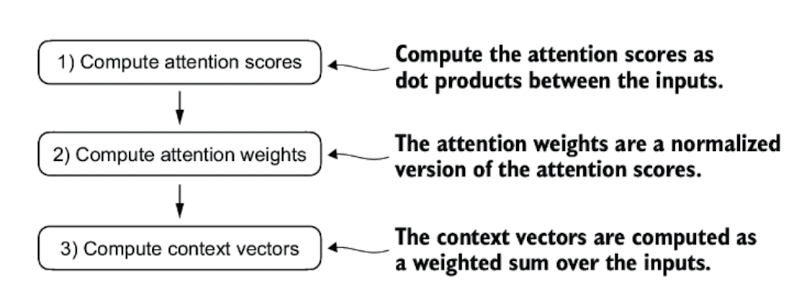


Calculating Attention Scores:

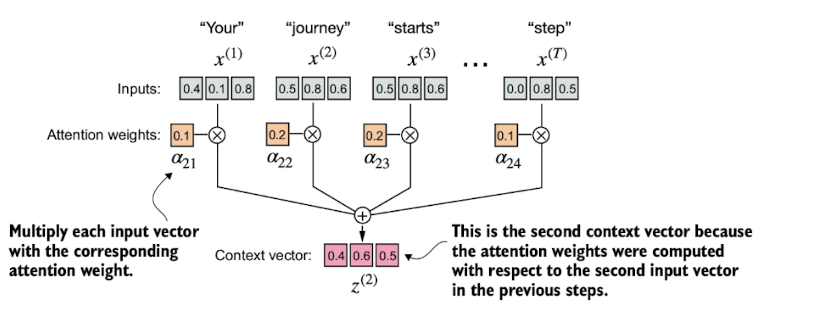


Context vectors are essentially the weighted sum of the attention weights and the input vectors
</div>

## IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

<div class="alert alert-block alert-info">
Our next step will be to implement the self-attention mechanism used in the original transformer architecture, the GPT models, and most other popular LLMs. This self-attention mechanism is also called scaled dot-product attention. Figure below shows how this self-attention mechanism fits into the broader context of implementing an LLM.

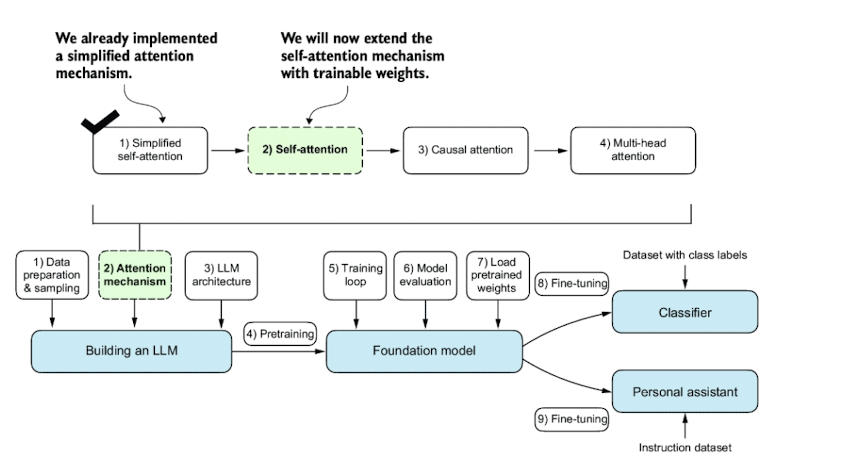

Previously, we coded a simplified attention mechanism to understand the basic mechanism behind attention mechanisms. Now, we add trainable weights to this attention mechanism. Later, we will extend this self-attention mechanism by adding a causal mask and multiple heads.

</div>

## Objective:
We want to compute the context Vector for every given input token. So this objective is the same as the objective was in the self attention remember that we did previously. We want to take each token embedding add attention (how this token related to all the other tokens in the sentence) to it and generate a context vector for that token. The context Vector can be thought of as an enriched input embedding Vector.

IN self attention with trianable weights, we will introduce the concept of trainable weight matrices that are updated during model training. These trainable weight matrices are crucial so that the model (specifically, the attention module inside the model) can learn to produce “good” context vectors.



<div class="alert alert-block alert-info">
## Trainable Weight Matrices
We will implement the self-attention mechanism step by step by introducing the three trainable weight matrices Wq, Wk, and Wv. three The first is called the weight Matrix for query,  the second is called weight Matrix for key and the third is called the weight Matrix for Value 
These three matrices are used to project the embedded input tokens, x(i), into query, key, and value vectors, respectively.

The first step here is to convert the input embeddings into key query and value vectors

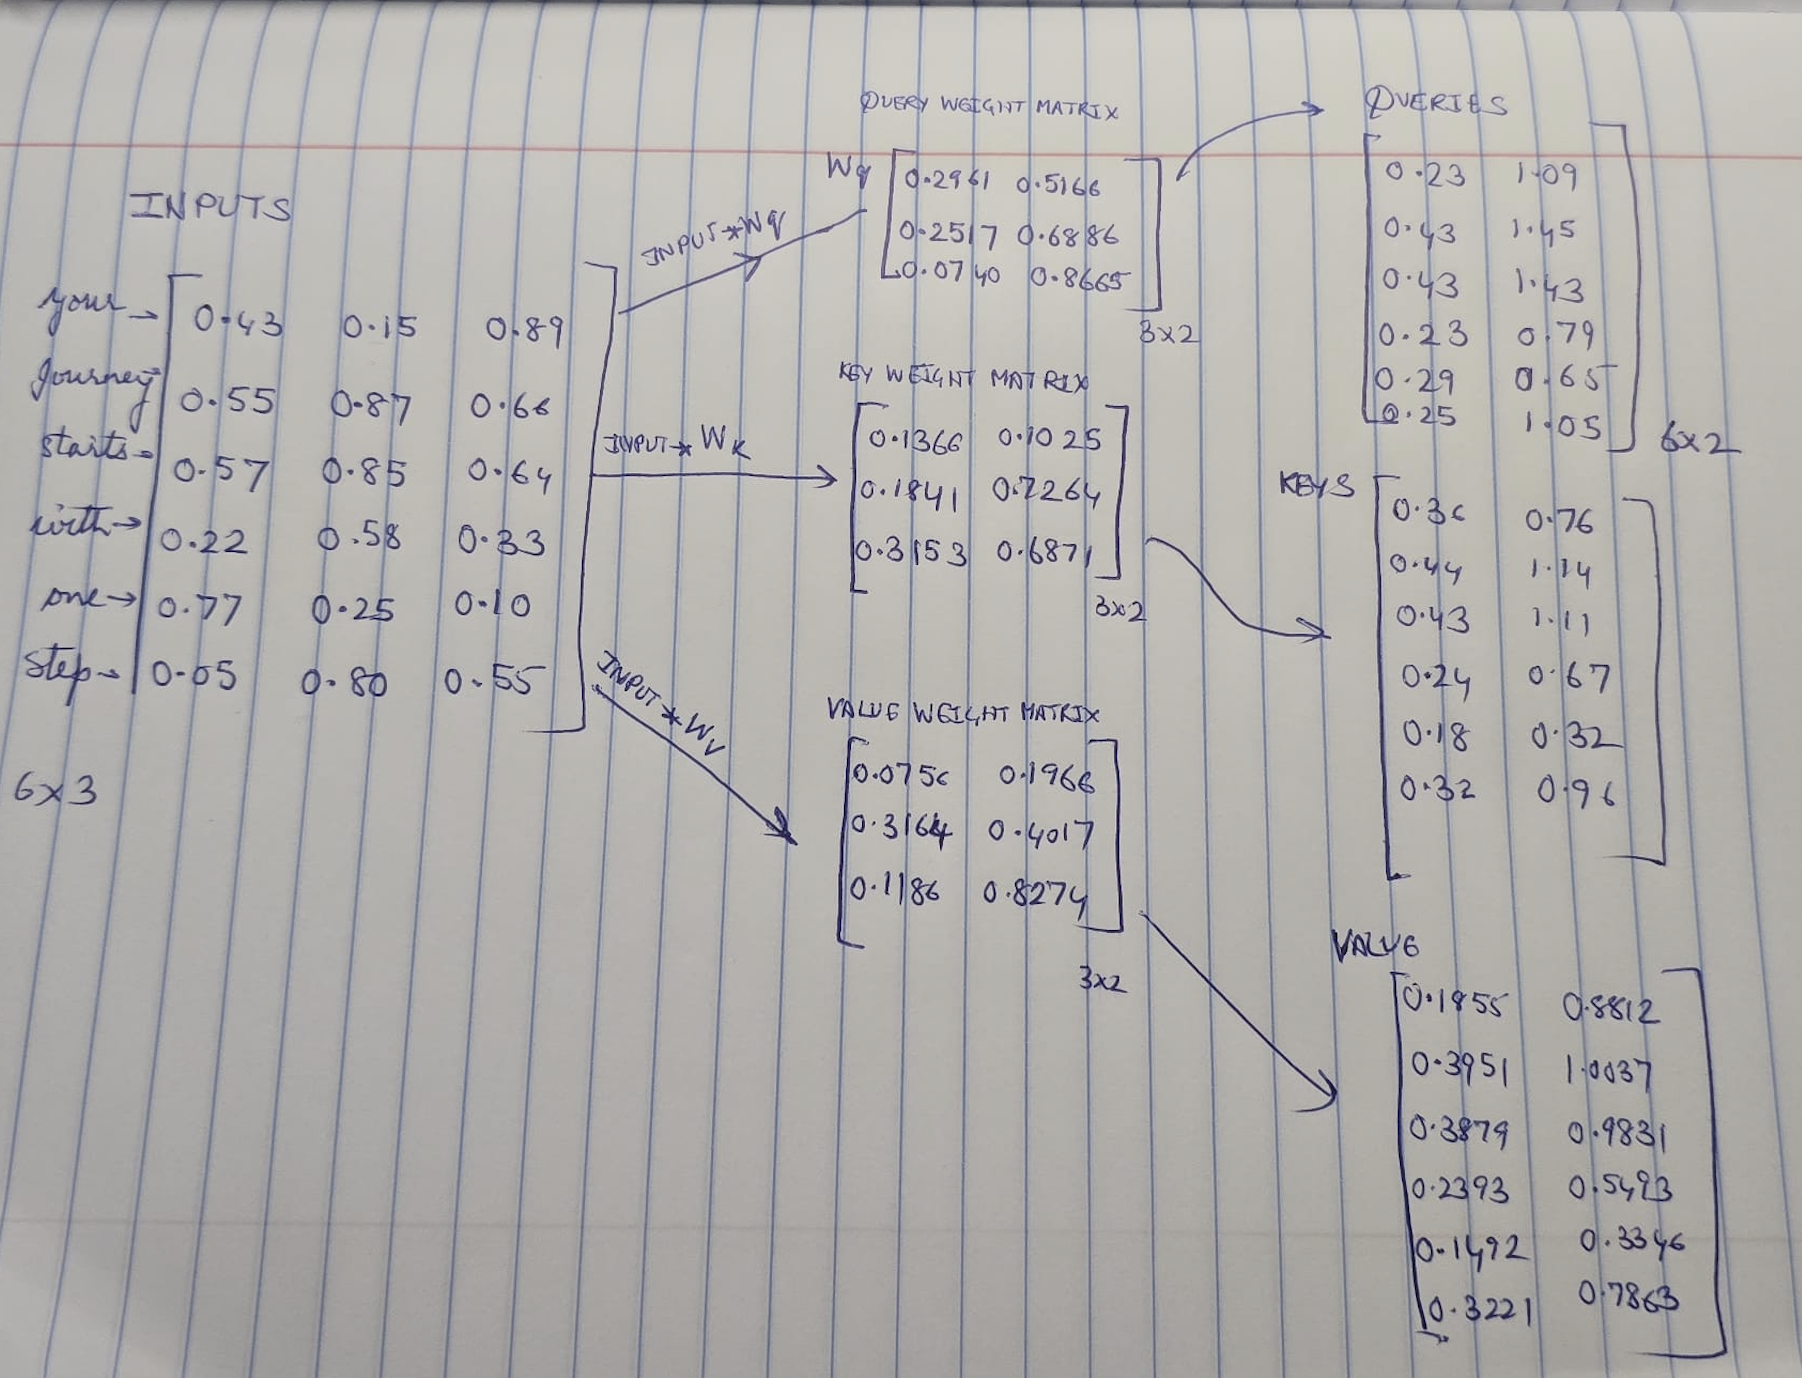

<br>

We have initialized the query weight matrix, key weight matrix and the value weight matrix with some random values but these are the ones which are actually trained. Initially we do not know these parameters so we initialize them randomly and then train them so as to get context vectors later. What these matrices do is actually they project the inputs into a different dimension space.
The simplest way to think of the query Matrix and all the other weight matrices is the transformation from let's say a 3 dimensional space into in this case a 2 dimensional space.

So the way to interpret the uh query key and the value is that every row of the query key and value essentially represents one token and a
representation for that token. So henceforth after we get the queries key and values we are no longer going to look at the input embeddings.The input embeddings have been transformed into three matrices the query Matrix, the key Matrix and the value Matrix 

Also this transformation is not fixed. The key to these Transformations are these three weight matrices WQ, WK and WV. The
parameters of these weight matrices are to be optimized later that's why these are called as the trainable weight
matrices.  

</div>

In [1]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

<div class="alert alert-block alert-success">

Let's begin by defining a few variables:

</div>

<div class="alert alert-block alert-info">
    
#A The second input element

#B The input embedding size, d=3


#C The output embedding size, d_out=2

</div>

In [2]:
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

<div class="alert alert-block alert-info">
    
Note that in GPT-like models, the input and output dimensions are usually the same. 

But for illustration purposes, to better follow the computation, we choose different input (d_in=3)
and output (d_out=2) dimensions here.

</div>

<div class="alert alert-block alert-success">

Next, we initialize the three weight matrices Wq, Wk and Wv

</div>

In [3]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [4]:
print(W_query)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])


In [5]:
print(W_key)

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])


In [6]:
print(W_value)

Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


<div class="alert alert-block alert-info">
    
Note that we are setting requires_grad=False to reduce clutter in the outputs for
illustration purposes. 

If we were to use the weight matrices for model training, we
would set requires_grad=True to update these matrices during model training.

</div>

<div class="alert alert-block alert-success">

Next, we compute the query, key, and value vectors as shown earlier
</div>

In [7]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


<div class="alert alert-block alert-info">
    
As we can see based on the output for the query, this results in a 2-dimensional vector. 

This is because: we set the number of columns of the corresponding weight matrix, via d_out, to 2:

</div>

<div class="alert alert-block alert-success">

Even though our temporary goal is to only compute the one context vector z(2),  we still
require the key and value vectors for all input elements. 

This is because they are involved in computing the attention weights with respect to the query q(2)
</div>

<div class="alert alert-block alert-success">

We can obtain all keys and values via matrix multiplication:
</div>

In [8]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query
print("keys.shape:", keys.shape)

print("values.shape:", values.shape)

print("queries.shape:", queries.shape)
print(values)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


<div class="alert alert-block alert-info">
    
As we can tell from the outputs, we successfully projected the 6 input tokens from a 3D
onto a 2D embedding space:

</div>

<div class="alert alert-block alert-success">
We have obtained the query, key and value matrix.
    
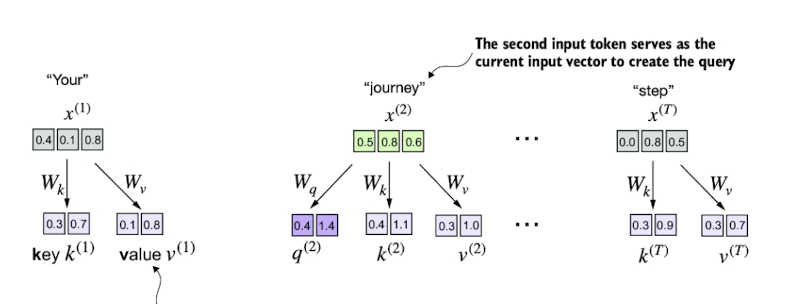

</div>

<div class="alert alert-block alert-success">

Now, let's compute the attention score 

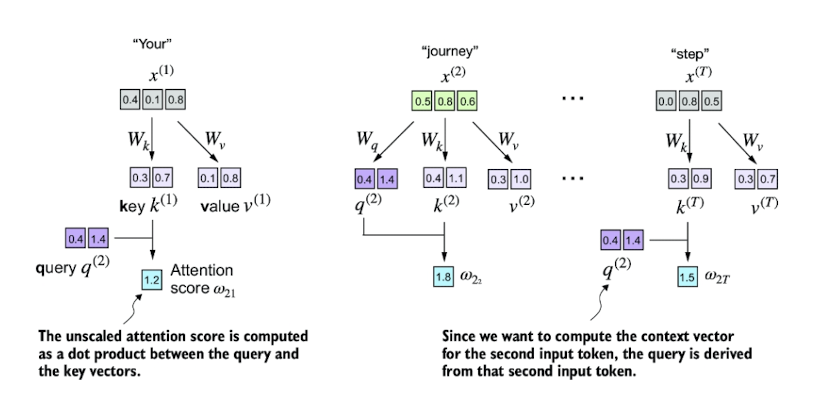

The attention score computation is a dot-product computation similar to what we used in the simplified self-attention mechanism. The new aspect here is that we are not directly computing the dot-product between the input elements but using the query and key obtained by transforming the inputs via the respective weight matrices.

The mathematical operation which helps us to find whether two vectors are aligned or not that is the dot product operation. Every query will
have an attention score with all the other keys.So for example if you look at query number two for "Journey" it will have an attention score with key number one,  it will have an attention score with the key number two and similarly it will have an attention score for the final key as well.

</div>

In [9]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


<div class="alert alert-block alert-success">
Again, we can generalize this computation to all attention scores via matrix multiplication:</div>

In [10]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [11]:
attn_scores = queries @ keys.T # omega
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


<div class="alert alert-block alert-info">
What does this attention score Matrix symbolize. The first row is contains the attention scores between the first query and all
all the other Keys,  the second row contains the attention scores between the second query and all the other Keys and similarly the last row contains the attention score between the last query and all the other keys.
</div>

<div class="alert alert-block alert-success">
    
We compute the attention weights by scaling the attention scores and using the softmax function we used earlier. 

The difference to earlier is that we now scale the attention scores by dividing them by the square root of the
embedding dimension of the keys. 

Note that taking the square root is mathematically the
same as exponentiating by 0.5:

After getting the attention score we are going to scale it by square root of D and that's why it's also called as scaled dot product attention
</div>

In [12]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) #note scaling by sqrt d - embedding dimension of key
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [13]:
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)
print(attn_weights)
print(d_k)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
2


## WHY DIVIDE BY SQRT (DIMENSION)

<div class="alert alert-block alert-warning">

Reason 1: For stability in learning

The softmax function is sensitive to the magnitudes of its inputs. When the inputs are large, the differences between the exponential values of each input become much more pronounced. This causes the softmax output to become "peaky," where the highest value receives almost all the probability mass, and the rest receive very little.

In attention mechanisms, particularly in transformers, if the dot products between query and key vectors become too large (like multiplying by 8 in this example), the attention scores can become very large. This results in a very sharp softmax distribution, making the model overly confident in one particular "key." Such sharp distributions can make learning unstable,
    
</div>

## BUT WHY Scaling by SQRT of dimension?

<div class="alert alert-block alert-warning">

Reason 2: To make the variance of the dot product stable

The dot product of  Q and K increases the variance because multiplying two random numbers increases the variance.

The increase in variance grows with the dimension. 

Dividing by sqrt (dimension) keeps the variance close to 1
    
</div>

In [14]:
import torch

# Define the tensor
tensor = torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])

# Apply softmax without scaling
softmax_result = torch.softmax(tensor, dim=-1)
print("Softmax without scaling:", softmax_result)

# Multiply the tensor by 8 and then apply softmax
scaled_tensor = tensor * 8
softmax_scaled_result = torch.softmax(scaled_tensor, dim=-1)
print("Softmax after scaling (tensor * 8):", softmax_scaled_result)

Softmax without scaling: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor * 8): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


In [15]:
import numpy as np

# Function to compute variance before and after scaling
def compute_variance(dim, num_trials=1000):
    dot_products = []
    scaled_dot_products = []

    # Generate multiple random vectors and compute dot products
    for _ in range(num_trials):
        q = np.random.randn(dim)
        k = np.random.randn(dim)
        
        # Compute dot product
        dot_product = np.dot(q, k)
        dot_products.append(dot_product)
        
        # Scale the dot product by sqrt(dim)
        scaled_dot_product = dot_product / np.sqrt(dim)
        scaled_dot_products.append(scaled_dot_product)
    
    # Calculate variance of the dot products
    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

# For dimension 5
variance_before_5, variance_after_5 = compute_variance(5)
print(f"Variance before scaling (dim=5): {variance_before_5}")
print(f"Variance after scaling (dim=5): {variance_after_5}")

# For dimension 20
variance_before_100, variance_after_100 = compute_variance(100)
print(f"Variance before scaling (dim=100): {variance_before_100}")
print(f"Variance after scaling (dim=100): {variance_after_100}")



Variance before scaling (dim=5): 5.377261787658338
Variance after scaling (dim=5): 1.0754523575316675
Variance before scaling (dim=100): 103.95704846468873
Variance after scaling (dim=100): 1.039570484646887


<div class="alert alert-block alert-success">
    
We now compute the context vector as a weighted sum over the value
vectors. 

Here, the attention weights serve as a weighting factor that weighs the respective
importance of each value vector. 

We can use matrix multiplication to
obtain the output in one step:

</div>

In [16]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


In [17]:
context_vec = attn_weights @ values
print(context_vec)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


<div class="alert alert-block alert-success">
So what we have done so far 

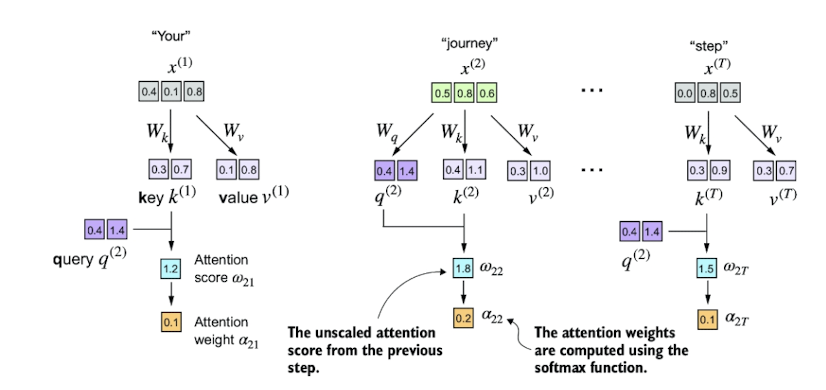

After computing the attention scores ω, the next step is to normalize these scores using the softmax function to obtain the attention weights 𝛼.

In the next section, we will generalize the code to compute all context vectors in the input sequence, z(1)to z (T)

</div>

## IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS

<div class="alert alert-block alert-success">
    
In the previous sections, we have gone through a lot of steps to compute the self-attention
outputs. 

This was mainly done for illustration purposes so we could go through one step at
a time. 

In practice, with the LLM implementation in the next chapter in mind, it is helpful to
organize this code into a Python class as follows:
    
</div>

In [18]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )

        context_vec = attn_weights @ values
        return context_vec

<div class="alert alert-block alert-warning">

In this PyTorch code, SelfAttention_v1 is a class derived from nn.Module, which is a
fundamental building block of PyTorch models, which provides necessary functionalities for
model layer creation and management.    
</div>

<div class="alert alert-block alert-warning">

The __init__ method initializes trainable weight matrices (W_query, W_key, and
W_value) for queries, keys, and values, each transforming the input dimension d_in to an
output dimension d_out.

</div>

<div class="alert alert-block alert-warning">

During the forward pass, using the forward method, we compute the attention scores
(attn_scores) by multiplying queries and keys, normalizing these scores using softmax.

</div>

<div class="alert alert-block alert-success">
    
Finally, we create a context vector by weighting the values with these normalized attention
scores.

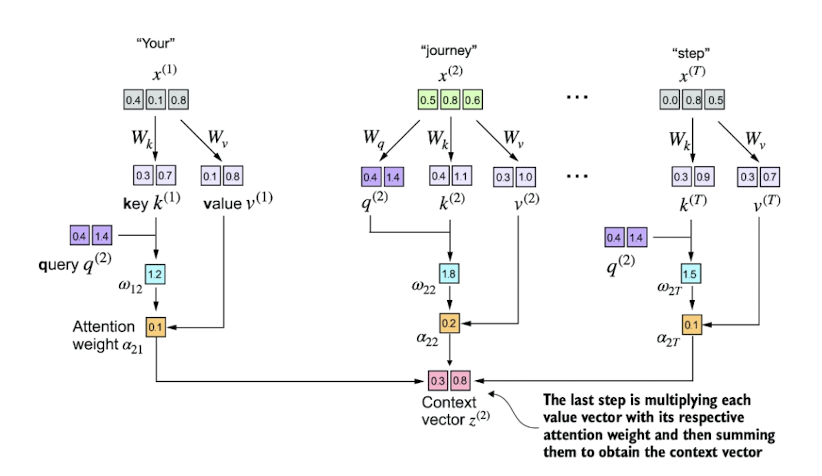

In the final step of the self-attention computation, we compute the context vector by combining all value vectors via the attention weights.

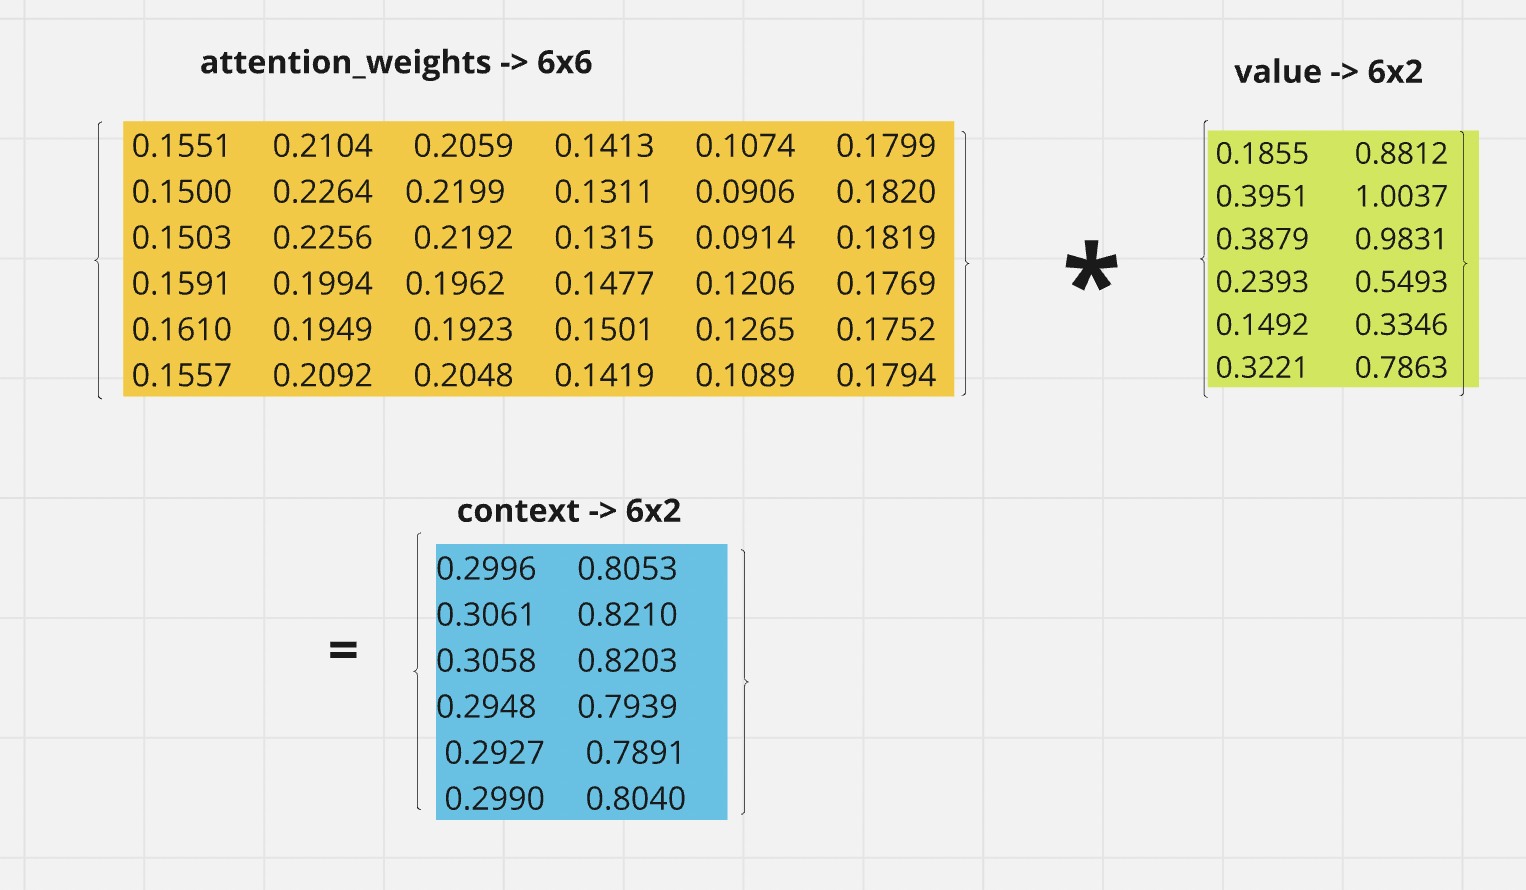
    
</div>

In [19]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Since inputs contains six embedding vectors, we get a matrix storing the six
context vectors, as shown in the above result. 
</div>

<div class="alert alert-block alert-info">

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of
context_vec_2 in the previous section.
    
</div>

<div class="alert alert-block alert-warning">

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
nn.Linear layers, which effectively perform matrix multiplication when the bias units are
disabled. 

</div>

<div class="alert alert-block alert-warning">

Additionally, a significant advantage of using nn.Linear instead of manually
implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
initialization scheme, contributing to more stable and effective model training.

</div>

In [20]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

<div class="alert alert-block alert-success">

You can use the SelfAttention_v2 similar to SelfAttention_v1:
    
</div>

In [21]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they
use different initial weights for the weight matrices since nn.Linear uses a more
sophisticated weight initialization scheme.
    
</div>

## Summary of the entire Self Attention Mechanism
<div class="alert alert-block alert-info">

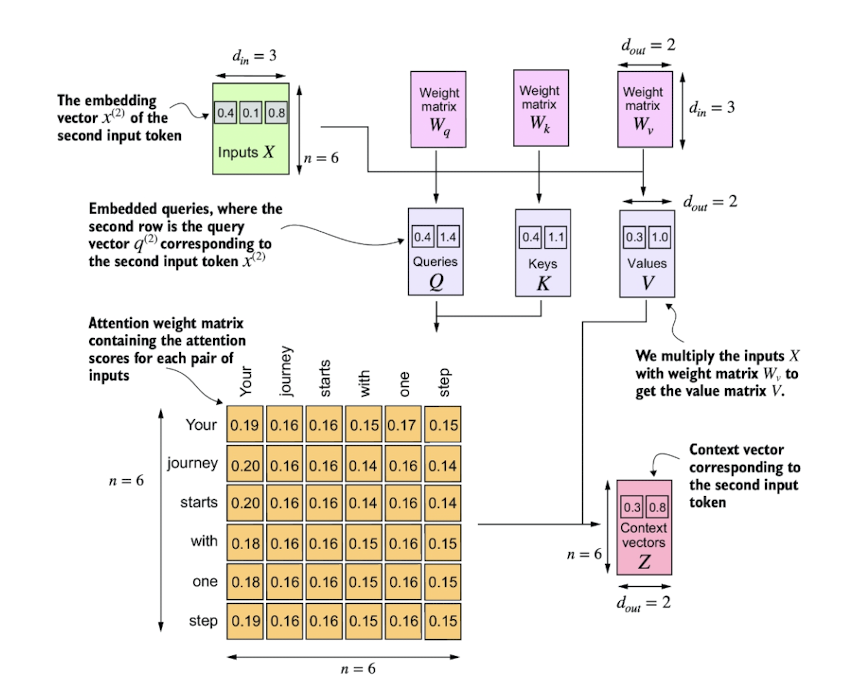

In self-attention, we transform the input vectors in the input matrix X with the three weight matrices, Wq, Wk, and Wv. <br>
The new compute the attention weight matrix based on the resulting queries (Q) and keys (K). <br>
Using the attention weights and values (V), we then compute the context vectors (Z). <br>
For visual clarity, we focus on a single input text with n tokens, not a batch of multiple inputs. 
Consequently, the three-dimensional input tensor is simplified to a two-dimensional matrix in this context. 
This approach allows for a more straightforward visualization and understanding of the processes involved. 
For consistency with later figures, the values in the attention matrix do not depict the real attention weights. (The numbers in this figure are truncated to two digits after the decimal point to reduce visual clutter. The values in each row should add up to 1.0 or 100%.)


</div>

## Why this names: Query, Key and Values

<div class="alert alert-block alert-success">
Think of it like searching for a book in a library:

Query (Q) → What you're looking for (e.g., a book title).
Key (K) → The labels or descriptions of books in the library catalog.
Value (V) → The actual books (or their content).
The system compares the query with the keys to find relevant values.
</div>

## How this works in a transformer

<div class="alert alert-block alert-info">
Each input token (word) is mapped into three different vectors:

Query (Q) → Represents what this word is "looking for" in other words.
Key (K) → Represents what this word has to offer to others.
Value (V) → Represents the actual information content of the word.
The attention mechanism works by:

Comparing Q with K:

Compute the dot product of the query (Q) and all keys (K).
This gives a score indicating how much attention the query should pay to each key.
Applying Softmax to Get Attention Weights:

The scores are normalized into probabilities.
Weighting the Values (V):

Each value (V) is multiplied by its corresponding attention weight.
The final result is a weighted sum of values, representing the attention output.
</div>

# How Are Weights Trained in the Transformer Model?
<div class="alert alert-block alert-success">
Training a **Transformer** follows the standard **gradient-based optimization** approach using **backpropagation and gradient descent** (typically Adam optimizer). Let's break it down step by step:

---

## **1️⃣ What Needs to Be Trained?**
During training, the model learns three main sets of parameters:
1. **Embedding Weights**: The word/token embeddings.
2. **Self-Attention Weights**:
   - **Weight matrices for Query (W_Q), Key (W_K), and Value (W_V)** in each attention head.
3. **Feedforward Network Weights**:
   - **Linear layer weights** after attention.
   - **Final output projection** to vocab size.

These weights start as random values and are optimized during training.

---

## **2️⃣ Forward Pass: Computing Predictions**
Given an input sequence **X** (e.g., words in a sentence), the Transformer follows these steps:

1. **Convert words to embeddings**  
   Each token is mapped to a dense vector via an embedding layer.

2. **Compute Q, K, and V**  
   Each input embedding \( X \) is projected using trainable matrices:
   $$
   [
   Q = X W_Q, \quad K = X W_K, \quad V = X W_V
   ]
   $$
3. **Compute Attention Scores**  
   Using scaled dot-product attention:
   $$
   [
   \text{Attention}(Q, K, V) = \text{softmax} \left( \frac{Q K^T}{\sqrt{d_k}} \right) V
   ]
   $$
4. **Pass Through Feedforward Layers**  
   The attention output goes through linear + activation layers.

5. **Compute Output & Loss**  
   - In NLP tasks (e.g., translation), the output is compared to the correct sequence using **cross-entropy loss**.

---

## **3️⃣ Backpropagation: Learning the Weights**
The model **updates its weights** using the loss:

1. **Compute Loss Gradient**  
   - The difference between predicted and actual output is used to compute the gradient of the loss with respect to model weights.
  
2. **Backpropagate Through the Model**  
   - Gradients are calculated for **W_Q, W_K, W_V, and other weights** using **automatic differentiation**.

3. **Update Weights Using Gradient Descent**  
   - The optimizer (e.g., Adam) updates parameters:
   $$
   [
   W_Q \leftarrow W_Q - \eta \frac{\partial L}{\partial W_Q}
   ]
   $$
   - This is done for **all trainable weights** in the network.

---

## **4️⃣ Iterating Until Convergence**
- The process **repeats** for many training steps.
- Over time, the model learns to **assign meaningful attention scores**.
- The learned **Q, K, and V matrices** help capture word relationships in context.

---

# Overall process in short
✅ The Transformer learns by adjusting **W_Q, W_K, W_V, and other parameters**  
✅ Uses **backpropagation** through the entire model  
✅ Updates weights with **gradient descent (Adam optimizer)**  
✅ Over time, attention scores become **more accurate**, improving predictions  

</div>
